Alternatively: https://github.com/andy-sweet/napari-blob-detection

In [4]:
from skimage.io import imread
import stackview
import numpy as np
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu
import pyclesperanto_prototype as cle


StackViewNDArray([[ 3,  2,  2, ...,  1,  1,  1],
                  [ 3,  2,  2, ...,  1,  1,  2],
                  [ 3,  3,  2, ...,  1,  2,  2],
                  ...,
                  [ 7,  4,  3, ...,  2,  2,  2],
                  [14,  7,  3, ...,  2,  2,  2],
                  [26, 11,  3, ...,  2,  2,  2]], dtype=uint8)
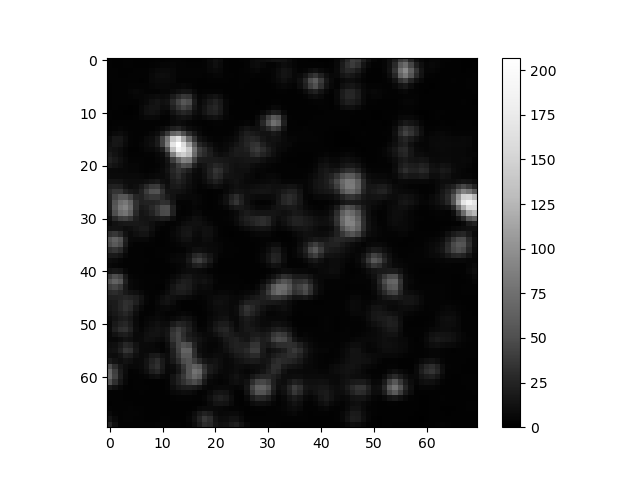
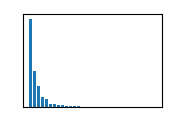

In [38]:
image = stackview.insight(imread('Desktop/test.tif')[90:160, 90:160])
image


In [39]:
background_subtracted = np.asarray(cle.top_hat_box(image, radius_x=10, radius_y=10))
background_subtracted

array([[ 2.,  1.,  1., ...,  0.,  0.,  0.],
       [ 2.,  1.,  1., ...,  0.,  0.,  1.],
       [ 2.,  2.,  1., ...,  0.,  1.,  1.],
       ...,
       [ 5.,  2.,  1., ...,  1.,  1.,  1.],
       [12.,  5.,  1., ...,  2.,  2.,  2.],
       [24.,  9.,  1., ...,  2.,  2.,  2.]], dtype=float32)

In this case, we use a manual thresold. This is not ideal, but it works for now.

In [40]:
threshold = 15

In [41]:
peaks = peak_local_max(background_subtracted, threshold_abs=threshold, min_distance=2)
peaks

array([[16, 13],
       [ 2, 56],
       [30, 45],
       [28,  3],
       [24, 46],
       [62, 54],
       [59, 16],
       [12, 31],
       [44, 32],
       [42, 54],
       [55, 14],
       [62, 29],
       [ 4, 39],
       [36, 39],
       [38, 50],
       [35, 66],
       [ 8, 14],
       [25,  9],
       [43, 37],
       [28, 11],
       [53, 32],
       [14, 56],
       [38, 17],
       [62, 35],
       [55, 28],
       [17, 28],
       [21, 20],
       [27, 24],
       [55,  3],
       [59, 61],
       [62, 48],
       [47, 26],
       [51,  3],
       [47,  3],
       [58,  9],
       [21, 56],
       [30, 29],
       [57, 32],
       [27, 34],
       [21, 59],
       [ 7, 46],
       [17, 56],
       [ 9, 20],
       [51, 22],
       [38, 31],
       [30, 35],
       [25, 52],
       [43, 14],
       [49, 53],
       [64, 21],
       [63, 41],
       [21, 63],
       [53, 62]], dtype=int64)

In [42]:
spots = cle.create(image.shape, dtype=np.uint32)
peaks.T

array([[16,  2, 30, 28, 24, 62, 59, 12, 44, 42, 55, 62,  4, 36, 38, 35,
         8, 25, 43, 28, 53, 14, 38, 62, 55, 17, 21, 27, 55, 59, 62, 47,
        51, 47, 58, 21, 30, 57, 27, 21,  7, 17,  9, 51, 38, 30, 25, 43,
        49, 64, 63, 21, 53],
       [13, 56, 45,  3, 46, 54, 16, 31, 32, 54, 14, 29, 39, 39, 50, 66,
        14,  9, 37, 11, 32, 56, 17, 35, 28, 28, 20, 24,  3, 61, 48, 26,
         3,  3,  9, 56, 29, 32, 34, 59, 46, 56, 20, 22, 31, 35, 52, 14,
        53, 21, 41, 63, 62]], dtype=int64)

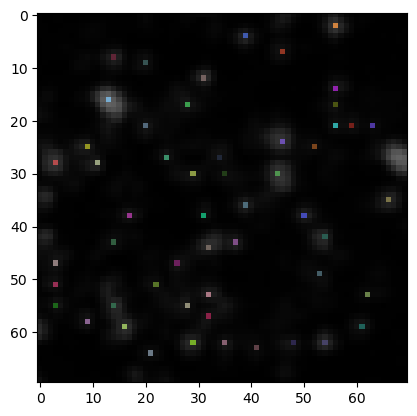

In [43]:
peaks = peaks[:,::-1]

labeled_spots = cle.pointlist_to_labelled_spots(peaks.T, spots)
labeled_spots
# cle.maximum_box(labeled_spots, radius_x=2, radius_y=2)

cle.imshow(image, continue_drawing=True)
cle.imshow(labeled_spots, alpha=0.6, labels=True)

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
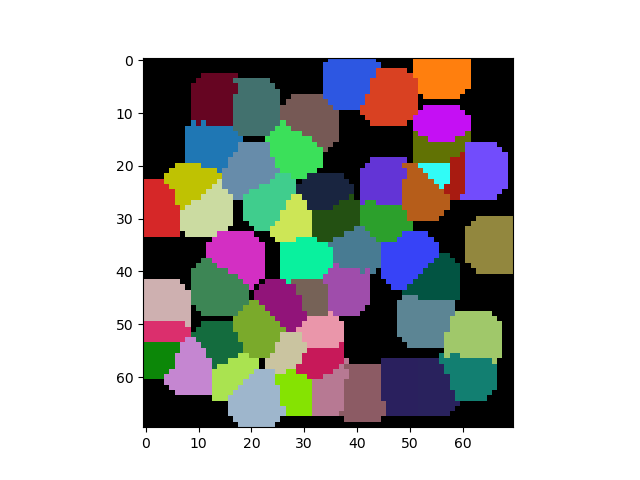

In [44]:
expanded_labels = cle.dilate_labels(labeled_spots, radius=5)
expanded_labels

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
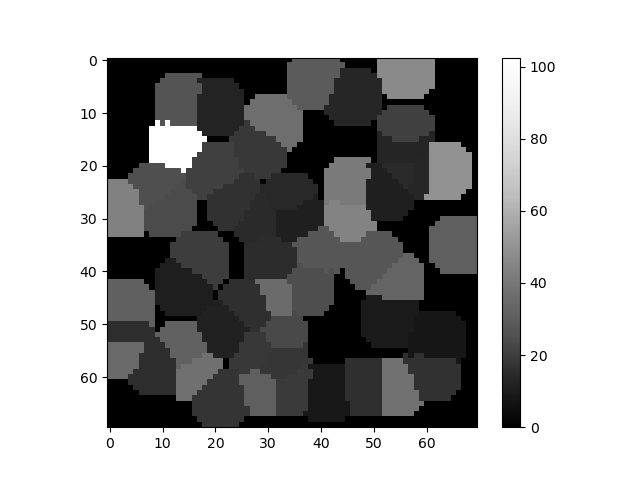
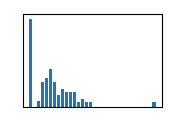

In [45]:
threshold_map = cle.maximum_intensity_map(background_subtracted, expanded_labels) / 2
threshold_map

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


StackViewNDArray([[ True,  True,  True, ..., False, False, False],
                  [ True,  True,  True, ..., False, False,  True],
                  [ True,  True,  True, ..., False,  True,  True],
                  ...,
                  [ True,  True,  True, ...,  True,  True,  True],
                  [ True,  True,  True, ...,  True,  True,  True],
                  [ True,  True,  True, ...,  True,  True,  True]])
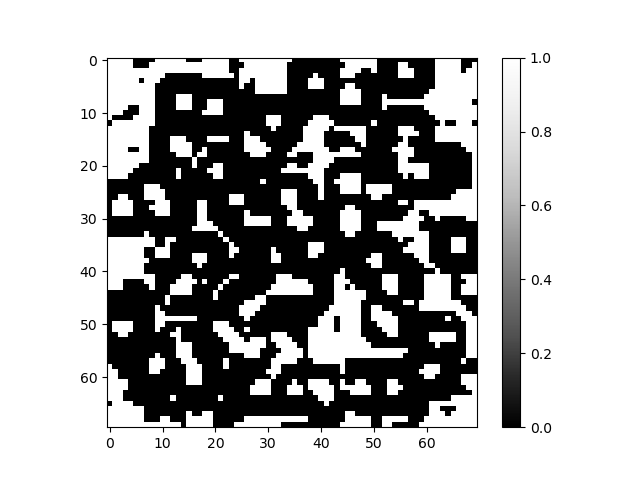
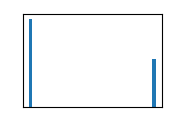

In [46]:
thresholded_image = np.asarray(background_subtracted) > np.asarray(threshold_map)
stackview.insight(thresholded_image)

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
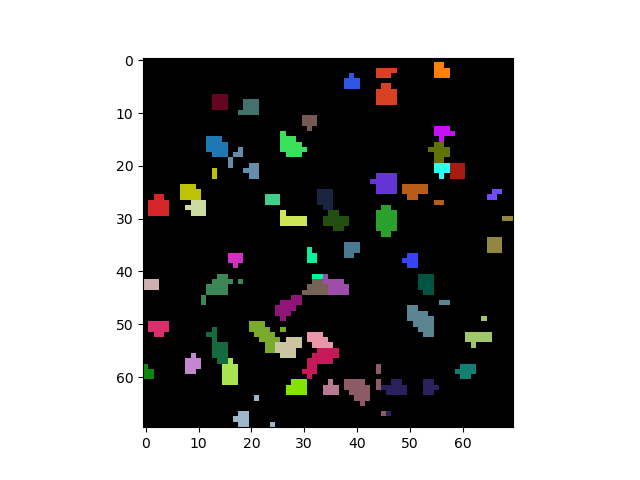

In [47]:
labeled_whatever = (expanded_labels * thresholded_image).astype(np.uint32)
labeled_whatever

In [49]:
stackview.curtain(image, labeled_whatever, zoom_factor=4, alpha=0.6)

In [51]:
vol = cle.voronoi_otsu_labeling(background_subtracted, spot_sigma=0, outline_sigma=0)
stackview.curtain(image, vol, zoom_factor=4)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


StackViewNDArray([[False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [ True, False, False, ..., False, False, False]])
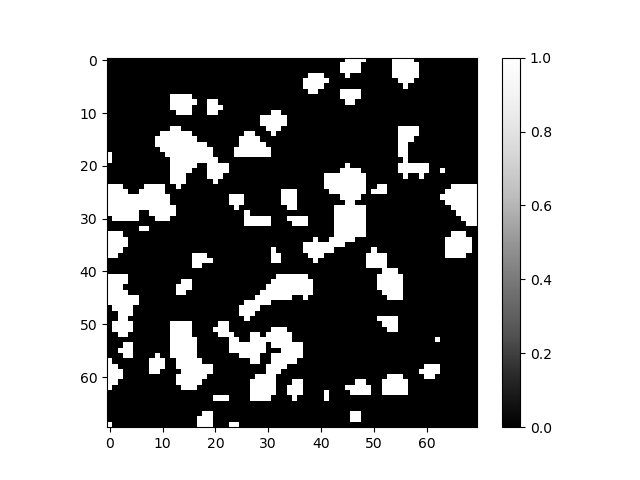
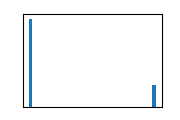

In [53]:
binary_image = background_subtracted > threshold
stackview.insight(binary_image)

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]], dtype=uint32)
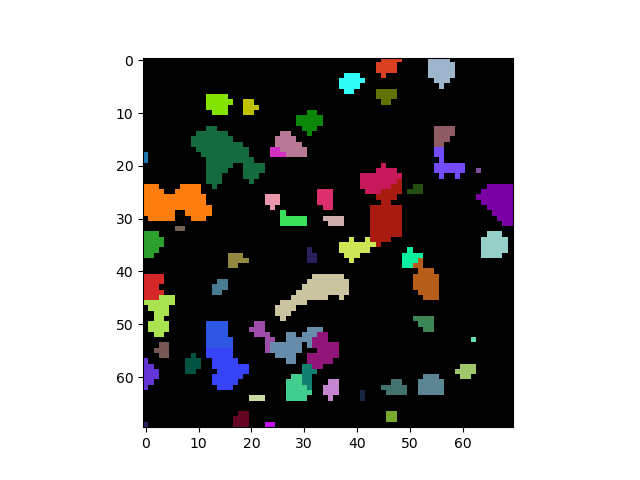

In [54]:
cle.voronoi_otsu_labeling(binary_image, spot_sigma=0, outline_sigma=0)


In [55]:
vol = cle.voronoi_otsu_labeling(binary_image, spot_sigma=0, outline_sigma=0)
stackview.curtain(image, vol, zoom_factor=4)